Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Answer 1: Deep Learning is a subset of machine learning that uses artificial neural networks with multiple hidden layers to automatically learn hierarchical representations from large volumes of data.

Evolution: It evolved from perceptrons and shallow neural networks, gaining success with increased computational power (GPUs), large datasets, and improved algorithms like backpropagation and ReLU.

Difference from Traditional ML: Traditional ML relies on manual feature engineering, while deep learning automatically learns features, excels on unstructured data (images, text, audio), and typically requires more data and computation.

Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Answer 2: A Perceptron is the simplest neural network model used for binary classification. It consists of input nodes, weights, a bias, a summation unit, and an activation function (usually a step function).

Functioning: Inputs are multiplied by weights, summed with a bias, and passed through an activation function to produce an output. During training, weights are updated based on prediction errors using a learning rule.

Limitations:

- Can only learn linearly separable problems
- Fails on problems like XOR
- Uses simple activation functions, limiting representational power

Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Answer 3: Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Without them, even deep networks would behave like linear models.

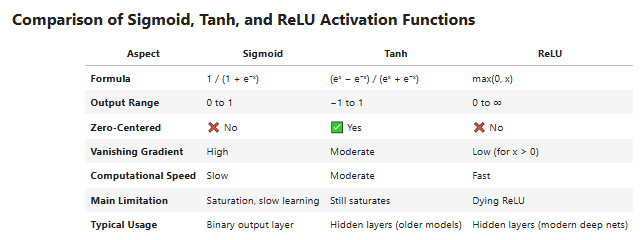

Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

Answer 4: A loss function measures the error for a single training example, while a cost function represents the aggregate error over the entire dataset (or a batch). Both guide the optimization process during neural network training.

Difference Between Loss Function and Cost Function:

Loss Function
- Error for one data point
- Single instance
- Measures individual prediction error
- Used to compute gradients per sample
- Squared Error, Log Loss

Cost Function
- Average or total error over dataset
- Whole dataset / batch
- Evaluates overall model performance
- Used to update model parameters
- Mean Squared Error (MSE), Cross-Entropy

Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop

Answer 5: Optimizers update the weights and biases of a neural network by minimizing the loss function during training. They control how fast and in what direction the model learns, directly affecting convergence speed and stability.

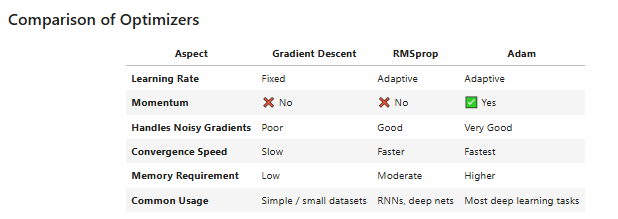

Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

In [1]:
import numpy as np

# --- AND Gate Dataset ---
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND outputs

# --- Initialize Weights and Bias ---
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# --- Step Activation Function ---
def step_function(z):
    return 1 if z >= 0 else 0

# --- Training the Perceptron ---
for _ in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)
        error = y[i] - y_pred

        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# --- Testing the Perceptron ---
print("Final Weights:", weights)
print("Final Bias:", bias)
print("\nPredictions:")
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]} -> Output: {output}")

Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004

Predictions:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 0
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 1


Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib

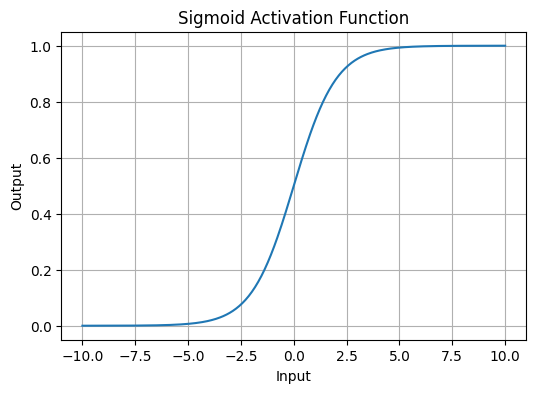

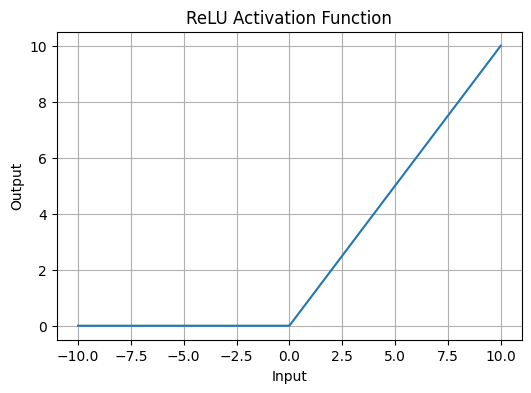

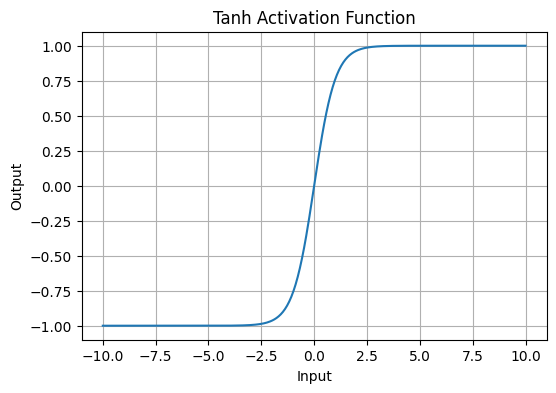

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Input Range ---
x = np.linspace(-10, 10, 400)

# --- Activation Functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# --- Plot Sigmoid ---
plt.figure(figsize=(6, 4))
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# --- Plot ReLU ---
plt.figure(figsize=(6, 4))
plt.plot(x, relu(x))
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# --- Plot Tanh ---
plt.figure(figsize=(6, 4))
plt.plot(x, tanh(x))
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()


Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

In [3]:
# --- Import Libraries ---
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

# --- Load MNIST Dataset ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# --- Normalize Data ---
X_train = X_train / 255.0
X_test = X_test / 255.0

# --- One-hot Encode Labels ---
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --- Build Neural Network ---
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# --- Compile Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Train Model ---
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    verbose=1
)

# --- Print Training Accuracy ---
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8273 - loss: 0.5968
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9592 - loss: 0.1433
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9729 - loss: 0.0918
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9793 - loss: 0.0688
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9832 - loss: 0.0540
Training Accuracy: 0.9830


Question 8: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy

In [4]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess the data
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model input (28x28 pixels to 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Step 7: Evaluate and print the training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8768 - loss: 0.4348 - val_accuracy: 0.9602 - val_loss: 0.1241
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9674 - loss: 0.1072 - val_accuracy: 0.9710 - val_loss: 0.0943
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9791 - loss: 0.0676 - val_accuracy: 0.9735 - val_loss: 0.0844
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9727 - val_loss: 0.0895
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0396 - val_accuracy: 0.9731 - val_loss: 0.0966
Training Accuracy: 98.55%


Question 9: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7822 - loss: 0.6156 - val_accuracy: 0.8500 - val_loss: 0.4114
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8597 - loss: 0.3779 - val_accuracy: 0.8606 - val_loss: 0.3828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8773 - loss: 0.3352 - val_accuracy: 0.8733 - val_loss: 0.3515
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8853 - loss: 0.3100 - val_accuracy: 0.8713 - val_loss: 0.3549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8940 - loss: 0.2892 - val_accuracy: 0.8775 - val_loss: 0.3373
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8986 - loss: 0.2743 - val_accuracy: 0.8767 - val_loss: 0.3406
Epoch 7/10
1875/1875 ━━━━━━━━

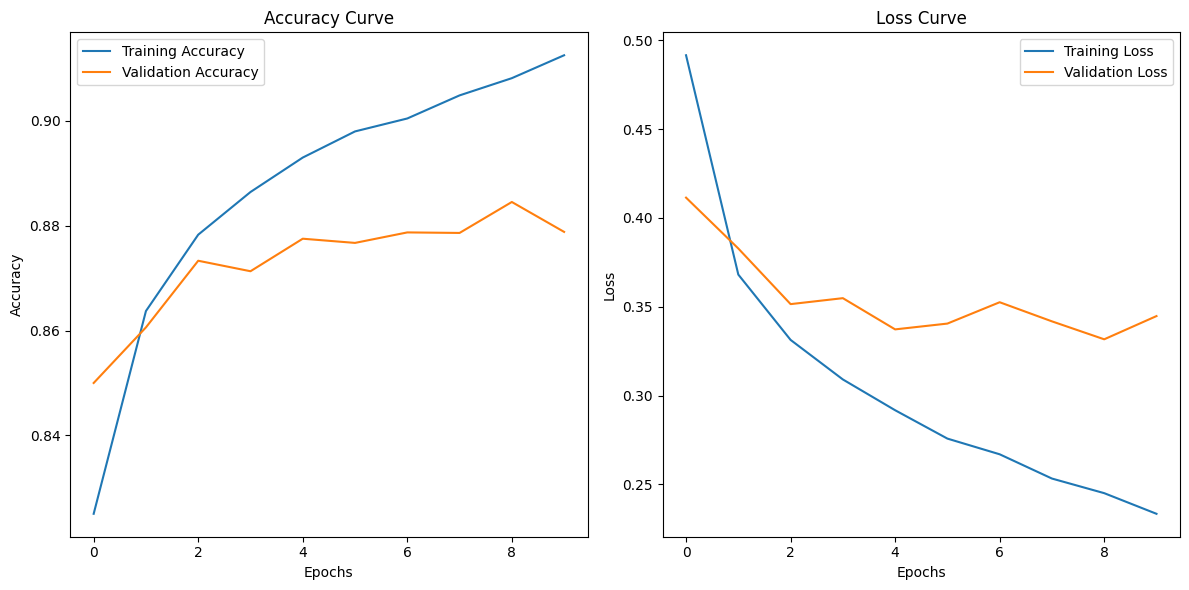

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model input (28x28 pixels to 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 6: Plot the loss and accuracy curves
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:
- How would you design a deep learning model (perceptron or multilayer NN)?
- Which activation function and loss function would you use, and why?
- How would you train and evaluate the model, considering class imbalance?
- Which optimizer would be suitable, and how would you prevent overfitting?


Answer 10:

1. Model Design
 - Use a Multilayer Perceptron (MLP) since the data is structured (transaction amount, merchant ID, location).
- Input layer includes normalized numerical features and embeddings for high-cardinality categorical features (e.g., merchant ID).

2. Activation & Loss Functions
-ReLU: Efficient, avoids vanishing gradients, works well for tabular data.
- Sigmoid (output layer): Outputs fraud probability.

3. Training & Evaluation (Imbalanced Data)
- Handle imbalance using:
- Class weights (give more importance to fraud cases), or
- Oversampling (e.g., SMOTE).
- Use train/validation/test split.
- Evaluate with:
Precision, Recall, F1-score (more important than accuracy); ROC-AUC to measure class separation.
